In [1]:
%load_ext autoreload
%autoreload 2

# Mutational distance observations

How does evolutionary distance relate to functional distance in mutated circuits?

In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data/raw/summarise_simulation/2024_11_27_145142/tabulated_mutation_info.csv')

In [4]:
data['Log sensitivity'] = np.log10(data['sensitivity_wrt_species-6'])
first_numbers = (data.sort_values('mutation_num')
                      .groupby(['circuit_name', 'sample_name'])['Log sensitivity']
                      .transform('first'))

data['Sensitivity difference'] = data['Log sensitivity'] - first_numbers

data[['Sensitivity difference', 'Log sensitivity', 'circuit_name', 'mutation_num', 'sample_name']].iloc[:10]

,Sensitivity difference,Log sensitivity,circuit_name,mutation_num,sample_name
0,0.000000,0.000000,toy_mRNA_circuit_0,0,RNA_0
1,0.000000,-1.011431,toy_mRNA_circuit_0,0,RNA_1
2,0.000000,-3.621418,toy_mRNA_circuit_0,0,RNA_2
3,0.000000,0.000000,toy_mRNA_circuit_0,1,RNA_0
4,0.261296,-0.750135,toy_mRNA_circuit_0,1,RNA_1
5,-0.111589,-3.733006,toy_mRNA_circuit_0,1,RNA_2
6,0.000000,0.000000,toy_mRNA_circuit_0,1,RNA_0
7,0.105053,-0.906378,toy_mRNA_circuit_0,1,RNA_1
8,-0.037523,-3.658940,toy_mRNA_circuit_0,1,RNA_2
9,0.000000,0.000000,toy_mRNA_circuit_0,1,RNA_0


In [5]:
def bin_array(array, n_bins):
    bins = np.linspace(array.min(), array.max(), n_bins + 1)
    bin_indices = np.digitize(array, bins) - 1
    return bin_indices


first_numbers = pd.DataFrame(first_numbers)
first_numbers['Log sensitivity binned'] = bin_array(first_numbers['Log sensitivity'], 10)

<Axes: xlabel='mutation_num', ylabel='Sensitivity difference'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


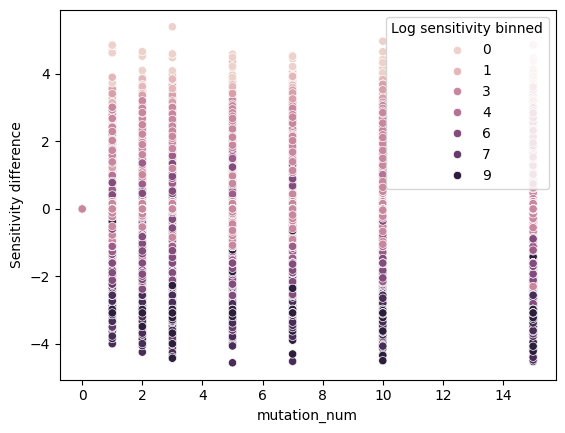

In [6]:
filt = (data['sample_name'] == 'RNA_2') # & (first_numbers > 0.1)
sns.scatterplot(data[filt], x= 'mutation_num', y='Sensitivity difference', hue=first_numbers['Log sensitivity binned'].loc[data[filt].index])

In [7]:
# sns.lineplot(data[filt], x= 'mutation_num', y='Sensitivity difference', hue='circuit_name', legend=False)


In [8]:
filt2 = (data['sample_name'] == 'RNA_2') & (data['interacting'] != '[]')
data[filt2].sort_values('Sensitivity difference')

,circuit_name,mutation_name,mutation_num,mutation_type,mutation_positions,path_to_template_circuit,index,sample_num,name,interacting,...,min_amount,overshoot,RMSE,steady_states,response_time_wrt_species-6,precision_wrt_species-6,sensitivity_wrt_species-6,sample_name,Log sensitivity,Sensitivity difference
1377074,toy_mRNA_circuit_3442,RNA_0_m15-3,15,"[7, 0, 7, 7, 8, 8, 7, 10, 4, 4, 7, 9, 11, 3, 3]","[5, 13, 7, 4, 9, 16, 8, 1, 15, 18, 19, 3, 2, 0...",./data/ensemble_mutation_effect_analysis/2024_...,51.0,9.0,toy_mRNA_circuit_3442,[[0 1]],...,199.837510,0.000000,101.749250,199.837510,inf,133639.270000,0.000007,RNA_2,-5.125934,-4.473731
2156318,toy_mRNA_circuit_4826,RNA_0_m10-6,10,"[11, 9, 11, 9, 5, 4, 11, 2, 5, 0]","[5, 17, 3, 16, 4, 7, 13, 14, 19, 15]",./data/ensemble_mutation_effect_analysis/2024_...,46.0,9.0,toy_mRNA_circuit_4826,[[0 1]],...,151.861530,0.000000,98.330960,151.861530,inf,79620.170000,0.000013,RNA_2,-4.901023,-4.309268
280286,toy_mRNA_circuit_1495,RNA_2_m2-3,2,"[0, 4]","[14, 9]",./data/ensemble_mutation_effect_analysis/2024_...,123.0,9.0,toy_mRNA_circuit_1495,[[1 2]],...,14.238653,0.000000,8.287888,14.239119,inf,160545.190000,0.000006,RNA_2,-5.205597,-4.242481
2435189,toy_mRNA_circuit_821,RNA_0_m15-5,15,"[8, 7, 7, 7, 6, 6, 10, 11, 10, 11, 1, 7, 11, 1...","[15, 9, 16, 2, 0, 3, 18, 10, 11, 17, 7, 13, 12...",./data/ensemble_mutation_effect_analysis/2024_...,53.0,9.0,toy_mRNA_circuit_821,[[0 1]],...,199.780750,0.000000,184.366320,199.780750,inf,46594.707000,0.000021,RNA_2,-4.668337,-4.215324
795521,toy_mRNA_circuit_241,RNA_0_m10-3,10,"[2, 6, 3, 9, 4, 3, 10, 10, 4, 4]","[12, 16, 17, 13, 5, 19, 4, 18, 6, 10]",./data/ensemble_mutation_effect_analysis/2024_...,43.0,9.0,toy_mRNA_circuit_241,[[1 2]],...,182.435670,0.000000,60.847847,182.435670,inf,89896.516000,0.000011,RNA_2,-4.953743,-4.138314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254985,toy_mRNA_circuit_500,RNA_2_m1-5,1,[7],[3],./data/ensemble_mutation_effect_analysis/2024_...,117.0,9.0,toy_mRNA_circuit_500,[[0 2]],...,104.703926,0.000000,33.015095,107.902930,474.94990,1.801037,0.555236,RNA_2,-0.255523,4.854150
2254979,toy_mRNA_circuit_500,RNA_2_m1-3,1,[7],[3],./data/ensemble_mutation_effect_analysis/2024_...,115.0,9.0,toy_mRNA_circuit_500,[[0 2]],...,104.703926,0.000000,33.015095,107.902930,474.94990,1.801037,0.555236,RNA_2,-0.255523,4.854150
1797719,toy_mRNA_circuit_4189,RNA_2_m15-5,15,"[6, 8, 10, 4, 5, 6, 0, 4, 1, 2, 11, 7, 0, 6, 10]","[5, 0, 11, 9, 19, 15, 2, 14, 10, 13, 1, 3, 17,...",./data/ensemble_mutation_effect_analysis/2024_...,165.0,9.0,toy_mRNA_circuit_4189,[[0 2]],...,120.681430,0.000000,77.234230,124.158100,472.94590,2.202228,0.454086,RNA_2,-0.342862,4.860368
2161220,toy_mRNA_circuit_4834,RNA_2_m10-7,10,"[4, 8, 1, 5, 9, 10, 8, 0, 1, 8]","[3, 0, 8, 7, 5, 13, 6, 12, 14, 4]",./data/ensemble_mutation_effect_analysis/2024_...,159.0,9.0,toy_mRNA_circuit_4834,[[0 2]\n [1 2]],...,31.181541,0.000015,13.192801,31.181557,32.06413,3.098851,0.322701,RNA_2,-0.491200,4.971055


[[-18.54   0.   -11.14]
 [  0.     0.     0.  ]
 [-11.14   0.     0.  ]]


<Axes: xlabel='mutation_num', ylabel='Log sensitivity'>

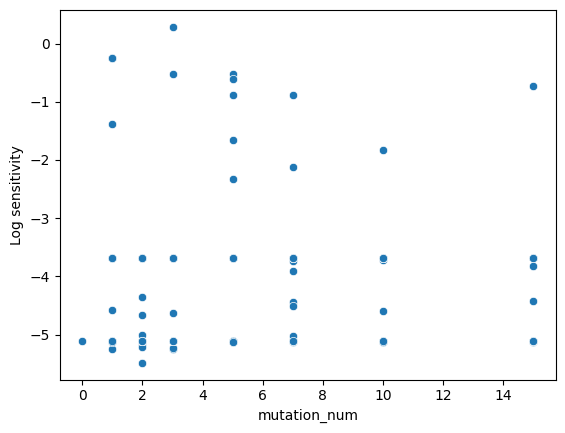

In [9]:
from synbio_morpher.utils.results.analytics.naming import get_true_interaction_cols

def print_energies(d, data):
    print(d[get_true_interaction_cols(data, 'energies')].apply(np.float64).to_numpy().reshape(3, 3))

i = 2255066
print_energies(data.loc[i], data)

c = data.loc[i]['circuit_name']

# for i, r in data[filt & (data['circuit_name'] == c)].iterrows():
#     print_energies(r, data)

filt3 = filt & (data['circuit_name'] == c)

sns.scatterplot(data[filt3], x= 'mutation_num', y='Log sensitivity') #, hue='Log sensitivity')



# Circuits with the smallest mean distance in sensitivities between mutation 0, 1, 2

In [20]:
filt4 = (data['sample_name'] == 'RNA_2') & data['mutation_num'].isin([0, 1, 2]) & data['interacting'].isin(['[]'])

data[filt4] 

,circuit_name,mutation_name,mutation_num,mutation_type,mutation_positions,path_to_template_circuit,index,sample_num,name,interacting,...,min_amount,overshoot,RMSE,steady_states,response_time_wrt_species-6,precision_wrt_species-6,sensitivity_wrt_species-6,sample_name,Log sensitivity,Sensitivity difference
17,toy_mRNA_circuit_0,RNA_0_m1-4,1,[8],[2],./data/ensemble_mutation_effect_analysis/2024_...,4.0,9.0,toy_mRNA_circuit_0,[],...,199.66588,0.0,0.034064,199.66588,inf,3000.1526,0.000333,RNA_2,-3.477143,0.144274
95,toy_mRNA_circuit_0,RNA_0_m2-6,2,"[4, 9]","[10, 3]",./data/ensemble_mutation_effect_analysis/2024_...,14.0,9.0,toy_mRNA_circuit_0,[],...,199.66588,0.0,0.034064,199.66588,inf,3000.1526,0.000333,RNA_2,-3.477143,0.144274
179,toy_mRNA_circuit_0,RNA_1_m1-2,1,[2],[13],./data/ensemble_mutation_effect_analysis/2024_...,58.0,9.0,toy_mRNA_circuit_0,[],...,199.66588,0.0,0.034064,199.66588,inf,3000.1526,0.000333,RNA_2,-3.477143,0.144274
248,toy_mRNA_circuit_0,RNA_1_m2-1,2,"[11, 9]","[10, 14]",./data/ensemble_mutation_effect_analysis/2024_...,65.0,9.0,toy_mRNA_circuit_0,[],...,199.66588,0.0,0.034064,199.66588,inf,3000.1526,0.000333,RNA_2,-3.477143,0.144274
251,toy_mRNA_circuit_0,RNA_1_m2-2,2,"[3, 6]","[16, 4]",./data/ensemble_mutation_effect_analysis/2024_...,66.0,9.0,toy_mRNA_circuit_0,[],...,199.66588,0.0,0.034064,199.66588,inf,3000.1526,0.000333,RNA_2,-3.477143,0.144274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534915,toy_mRNA_circuit_999,RNA_2_m2-3,2,"[5, 2]","[12, 17]",./data/ensemble_mutation_effect_analysis/2024_...,123.0,9.0,toy_mRNA_circuit_999,[],...,199.66588,0.0,0.000000,199.66588,inf,3000.1526,0.000333,RNA_2,-3.477143,0.000000
2534918,toy_mRNA_circuit_999,RNA_2_m2-4,2,"[11, 11]","[16, 10]",./data/ensemble_mutation_effect_analysis/2024_...,124.0,9.0,toy_mRNA_circuit_999,[],...,199.66588,0.0,0.000000,199.66588,inf,3000.1526,0.000333,RNA_2,-3.477143,0.000000
2534921,toy_mRNA_circuit_999,RNA_2_m2-5,2,"[11, 0]","[16, 8]",./data/ensemble_mutation_effect_analysis/2024_...,125.0,9.0,toy_mRNA_circuit_999,[],...,199.66588,0.0,0.000000,199.66588,inf,3000.1526,0.000333,RNA_2,-3.477143,0.000000
2534924,toy_mRNA_circuit_999,RNA_2_m2-6,2,"[5, 6]","[12, 9]",./data/ensemble_mutation_effect_analysis/2024_...,126.0,9.0,toy_mRNA_circuit_999,[],...,199.66588,0.0,0.000000,199.66588,inf,3000.1526,0.000333,RNA_2,-3.477143,0.000000


Text(0.5, 1.0, '4973 circuits with mutations > 0.1 log10 sensitivity change')

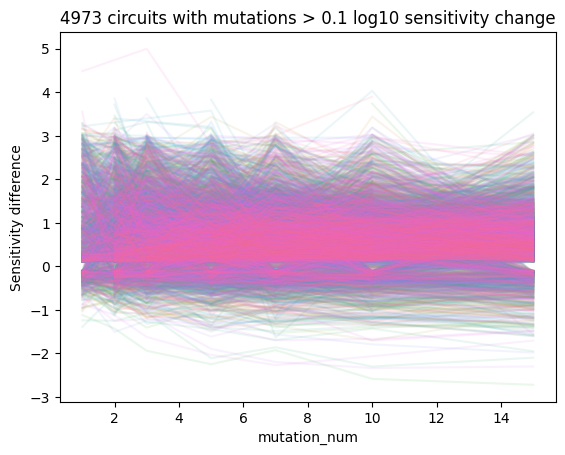

In [24]:
filt5 = (data['sample_name'] == 'RNA_2') & ~data['interacting'].isin(['[]'])
m = data[filt5].groupby(['circuit_name', 'sample_name', 'mutation_num'])['Sensitivity difference'].mean()

sns.lineplot(m[np.abs(m) > 0.1].reset_index(), x='mutation_num', y='Sensitivity difference', hue='circuit_name', legend=False, alpha=0.1)
plt.title(f'{m[np.abs(m) > 0.1].reset_index()["circuit_name"].nunique()} circuits with mutations > 0.1 log10 sensitivity change')

In [ ]:
summary_stats = data[filt5].groupby(['circuit_name', 'sample_name', 'mutation_num'])['Sensitivity difference'].agg(
    mean=np.mean,
    std=np.std,
    lower_quartile=lambda x: np.percentile(x, 25),
    upper_quartile=lambda x: np.percentile(x, 75)
).reset_index()
summary_stats

/tmp/ipykernel_160198/1588596643.py:8: FutureWarning: The provided callable <function mean at 0x7f501419c1f0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  summary_stats = data[filt5].groupby(['circuit_name', 'sample_name', 'mutation_num'])['Sensitivity difference'].agg(
/tmp/ipykernel_160198/1588596643.py:8: FutureWarning: The provided callable <function std at 0x7f501419c310> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  summary_stats = data[filt5].groupby(['circuit_name', 'sample_name', 'mutation_num'])['Sensitivity difference'].agg(


,circuit_name,sample_name,mutation_num,mean,std,lower_quartile,upper_quartile
0,toy_mRNA_circuit_0,RNA_2,0,0.000000,NaN,0.000000,0.000000
1,toy_mRNA_circuit_0,RNA_2,1,-0.027383,0.160999,-0.014467,0.060893
2,toy_mRNA_circuit_0,RNA_2,2,0.166504,0.534927,-0.042210,0.034575
3,toy_mRNA_circuit_0,RNA_2,3,0.111331,0.493110,-0.014038,0.089598
4,toy_mRNA_circuit_0,RNA_2,5,-0.028601,0.450209,-0.059402,0.113780
...,...,...,...,...,...,...,...
32516,toy_mRNA_circuit_998,RNA_2,10,1.644086,1.474187,1.053660,2.470199
32517,toy_mRNA_circuit_998,RNA_2,15,1.408423,1.504158,0.691593,2.191384
32518,toy_mRNA_circuit_999,RNA_2,7,1.542323,0.201376,1.471126,1.613521
32519,toy_mRNA_circuit_999,RNA_2,10,0.766907,1.518366,-0.059859,1.901317
